In [8]:
import pandas as pd 
from pycaret.classification import *

df = pd.read_csv("weather_classification_data.csv")

In [9]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [10]:
for col in df.select_dtypes(include='object').columns:
    categories, _ = pd.factorize(df[col])
    df[col] = categories

In [11]:
correlation_matrix = df.corr()
strong_correlation_cols = [col for col in correlation_matrix.columns if abs(correlation_matrix.loc['Weather Type', col]) >= 0.05 and col != 'Weather Type']

strong_correlation_cols

['Temperature',
 'Humidity',
 'Wind Speed',
 'Precipitation (%)',
 'Cloud Cover',
 'Atmospheric Pressure',
 'UV Index',
 'Season',
 'Location']

In [12]:
df = df.drop('Visibility (km)',  axis=1)
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Location,Weather Type
0,14.0,73,9.5,82.0,0,1010.82,2,0,0,0
1,39.0,96,8.5,71.0,0,1011.43,7,1,0,1
2,30.0,64,7.0,16.0,1,1018.72,5,1,1,2
3,38.0,83,1.5,82.0,1,1026.25,7,1,2,2
4,27.0,74,17.0,66.0,2,990.67,1,0,1,0


In [13]:
model_klasifikasi = setup(data = df,  target = 'Weather Type')
best_model = compare_models()

,Description,Value
0,Session id,2898
1,Target,Weather Type
2,Target type,Multiclass
3,Original data shape,"(13200, 10)"
4,Transformed data shape,"(13200, 10)"
5,Transformed train set shape,"(9240, 10)"
6,Transformed test set shape,"(3960, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9106,0.9926,0.9106,0.9111,0.9107,0.8808,0.8809,0.3370
rf,Random Forest Classifier,0.9087,0.9922,0.9087,0.9095,0.9088,0.8782,0.8784,0.1210
gbc,Gradient Boosting Classifier,0.9077,0.0000,0.9077,0.9083,0.9077,0.8769,0.8771,0.5680
et,Extra Trees Classifier,0.9049,0.9906,0.9049,0.9066,0.9052,0.8732,0.8735,0.1110
dt,Decision Tree Classifier,0.8997,0.9331,0.8997,0.9002,0.8997,0.8662,0.8664,0.0110
knn,K Neighbors Classifier,0.8844,0.9709,0.8844,0.8864,0.8848,0.8459,0.8463,0.4290
qda,Quadratic Discriminant Analysis,0.8563,0.0000,0.8563,0.8567,0.8563,0.8084,0.8085,0.0110
ada,Ada Boost Classifier,0.8455,0.0000,0.8455,0.8484,0.8462,0.7939,0.7944,0.0700
nb,Naive Bayes,0.8416,0.9365,0.8416,0.8426,0.8416,0.7887,0.7891,0.0100
lr,Logistic Regression,0.8385,0.0000,0.8385,0.8382,0.8379,0.7847,0.7850,2.0200


In [16]:
lightgbm = create_model('lightgbm')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9177,0.9939,0.9177,0.9181,0.9179,0.8903,0.8904
1,0.9134,0.9928,0.9134,0.9134,0.9134,0.8846,0.8846
2,0.9134,0.9922,0.9134,0.9137,0.9135,0.8846,0.8846
3,0.9156,0.9935,0.9156,0.9165,0.9158,0.8874,0.8876
4,0.8961,0.9910,0.8961,0.8960,0.8959,0.8615,0.8615
5,0.9177,0.9934,0.9177,0.9194,0.9181,0.8903,0.8906
6,0.9221,0.9941,0.9221,0.9223,0.9221,0.8961,0.8962
7,0.9004,0.9913,0.9004,0.9006,0.9003,0.8672,0.8674
8,0.8950,0.9907,0.8950,0.8969,0.8953,0.8600,0.8604


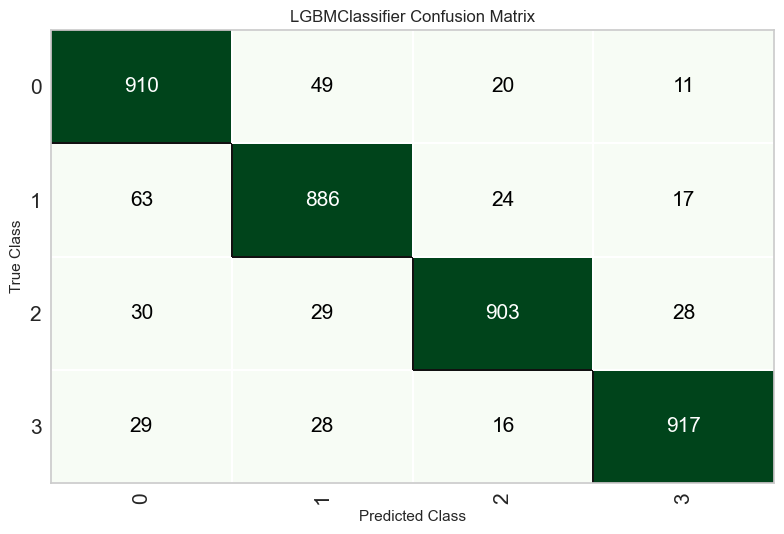

In [20]:
plot_model(lightgbm, plot = 'confusion_matrix')

In [25]:
save_model(lightgbm, 'lightgbm_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Temperature', 'Humidity',
                                              'Wind Speed', 'Precipitation (%)',
                                              'Cloud Cover',
                                              'Atmospheric Pressure', 'UV Index',
                                              'Season', 'Location'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               stra...
                  LGBM